# Define noise-corrupted data sets

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image

import numpy as np
import pickle

# 3D visualization
import pyvista as pv

from gravmag import plot_functions as plf

### Data points

In [2]:
with open('data_points.pickle', 'rb') as f:
    data_points = pickle.load(f)

In [3]:
# number of points along x and y
print(data_points['shape'])

# minimum x, maximum x, minimum y and maximum y
print(data_points['area'])

(50, 50)
[-5000, 5000, -4000, 6000]


### Noise-free gravity data

In [4]:
with open('gravity_data.pickle', 'rb') as f:
    gravity_data = pickle.load(f)

In [5]:
titles_tensor = ['gxx (E)', 'gxy (E)', 'gxz (E)', 'gyy (E)', 'gyz (E)', 'gzz (E)']
title_gz = ['gz (mGal)']
titles = titles_tensor[:5] + title_gz + [titles_tensor[-1]]
lables = ['(A)', '(B)', '(C)', '(D)', '(E)', '(G)', '(F)']
tensor = ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz']
fields = tensor[:5] + ['gz'] + [tensor[-1]]

In [6]:
ranges_tensor = []
for field in tensor:
    ranges_tensor.append(np.max(np.abs(gravity_data[field])))
ranges_tensor = 0.7*np.max(np.array(ranges_tensor))

In [7]:
ranges_gz = np.max(np.abs(gravity_data['gz']))

In [8]:
ranges_fields = 5*[ranges_tensor] + [ranges_gz] + [ranges_tensor]

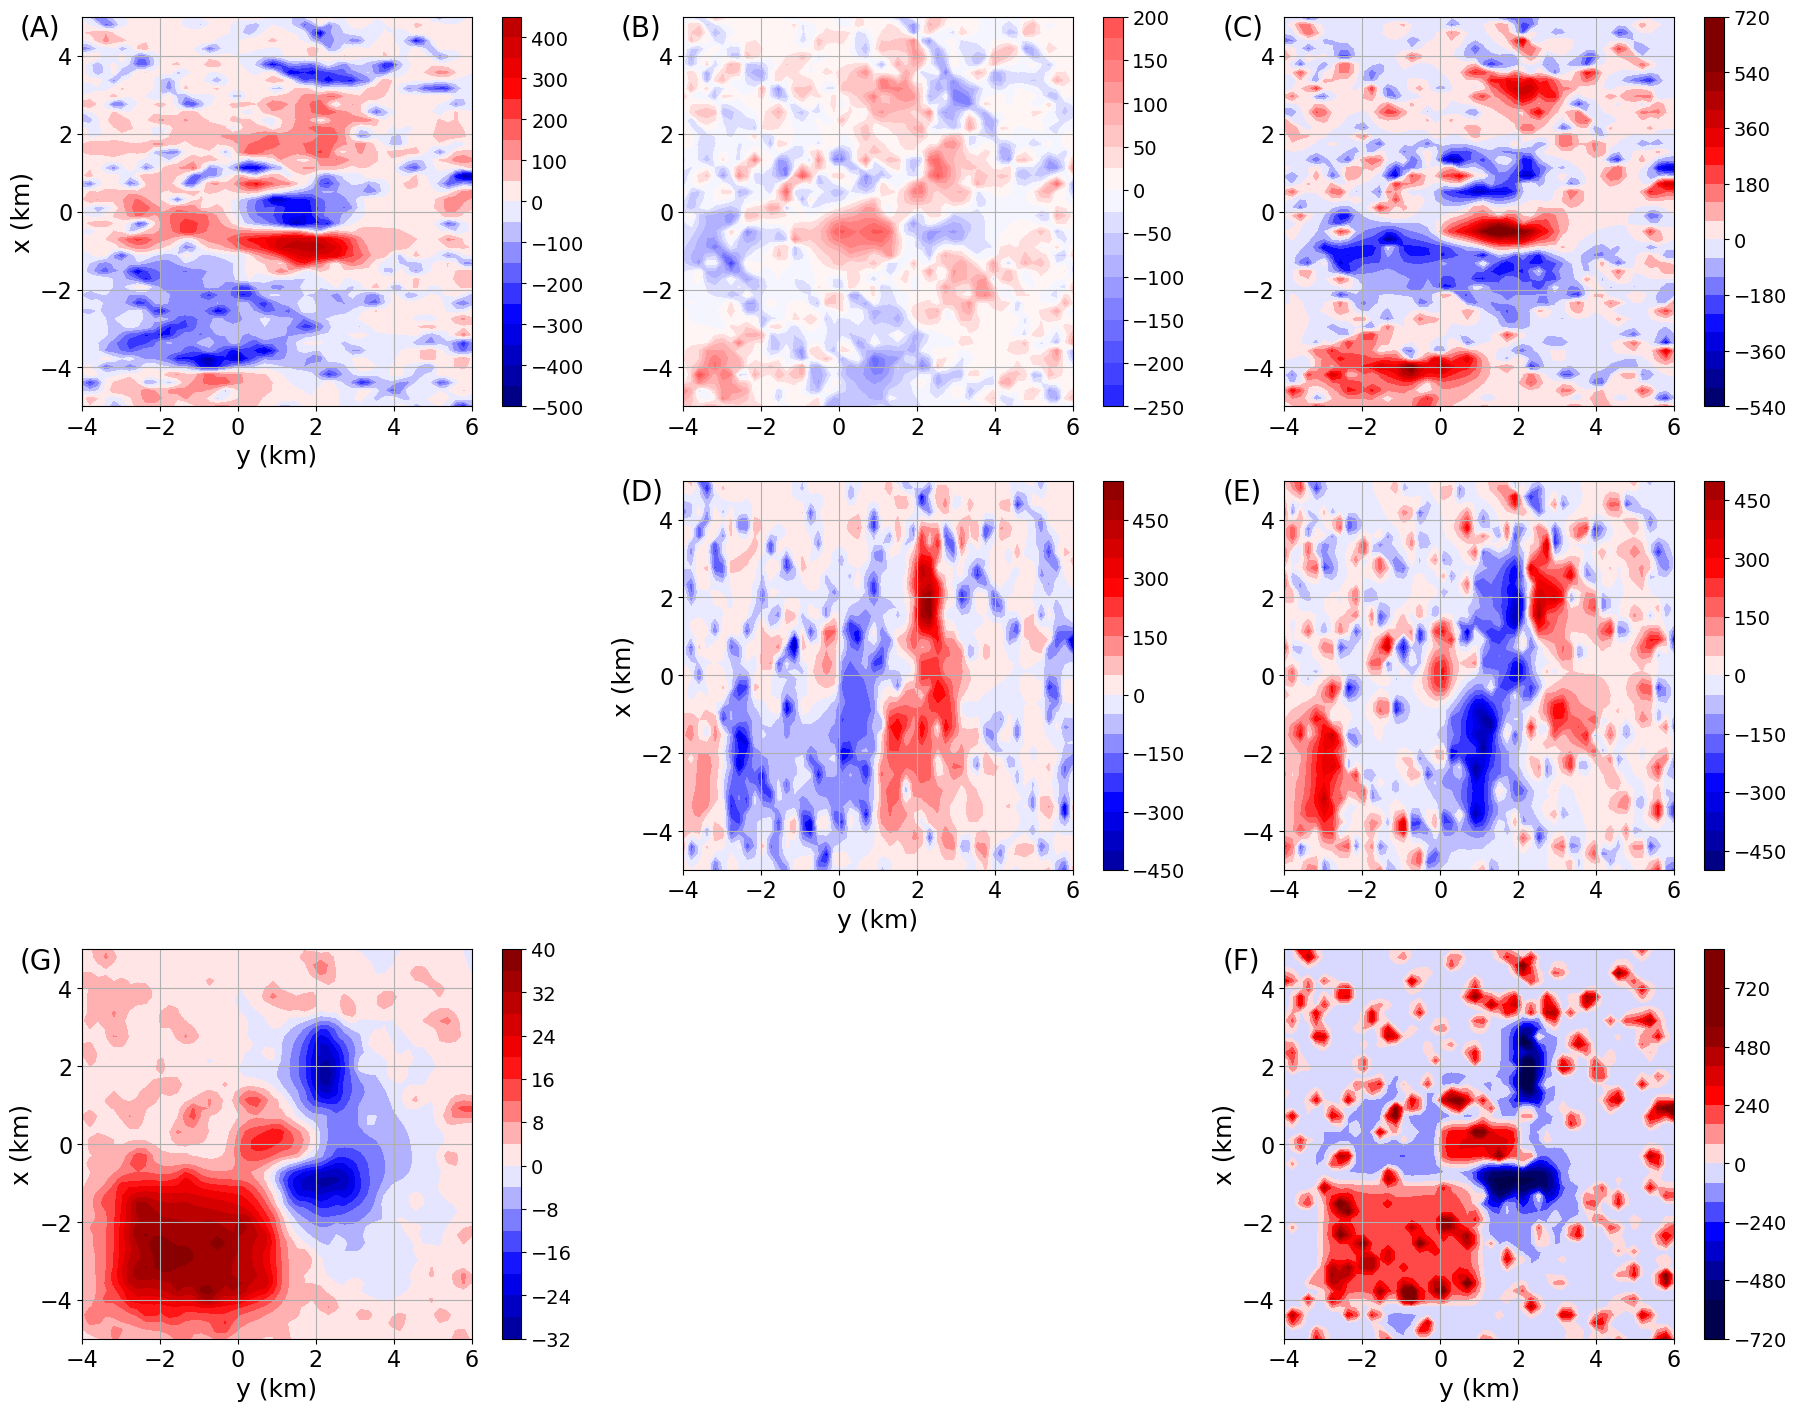

In [9]:
fig = plt.figure(layout= 'constrained', figsize=(18,14))
mosaic = fig.subplot_mosaic('''
                            abc
                            .de
                            f.g
                            ''')
for (ax, field, title, ranges_field, label) in zip(
    mosaic.values(), fields, titles, ranges_fields, lables
):
    ax.axis('scaled')
    im = ax.contourf(data_points['coordinates']['y'].reshape(data_points['shape'])*0.001, 
                     data_points['coordinates']['x'].reshape(data_points['shape'])*0.001, 
                     gravity_data[field].reshape(data_points['shape']), 20, 
                     cmap='seismic', vmin=-ranges_field, vmax=ranges_field)
    cb = fig.colorbar(im, ax=ax)
    cb.ax.tick_params(labelsize=14)
    ax.set_ylim(0.001*data_points['area'][0], 0.001*data_points['area'][1])
    ax.set_xlim(0.001*data_points['area'][2], 0.001*data_points['area'][3])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid()
    ax.annotate(label, xy=(-0.16, 0.95), xycoords='axes fraction', fontsize=20)

for element in ['a','d','f','g']:
    mosaic[element].set_ylabel('x (km)', fontsize=18)
    mosaic[element].set_xlabel('y (km)', fontsize=18)

plt.show()

### Define noise levels

In [10]:
# reference for noise level
# maximum absolute value of noise-free data
noise_level_reference = np.max(np.abs(gravity_data['gz']))

In [11]:
noise_level_reference

39.45720044489123

In [12]:
# maximum noise level
noise_level_max = 0.10*noise_level_reference

# minimum noise level
noise_level_min = 0.005*noise_level_reference

In [13]:
noise_level_max

3.945720044489123

In [14]:
noise_level_min

0.19728600222445614

In [15]:
# define 20 noise levels from min to max
noise_levels = np.linspace(noise_level_min, noise_level_max, 20)

In [16]:
noise_levels

array([0.197286  , 0.394572  , 0.59185801, 0.78914401, 0.98643001,
       1.18371601, 1.38100202, 1.57828802, 1.77557402, 1.97286002,
       2.17014602, 2.36743203, 2.56471803, 2.76200403, 2.95929003,
       3.15657604, 3.35386204, 3.55114804, 3.74843404, 3.94572004])

### Noise corrupted gravity disturbance data

In [17]:
noisy_data = dict()

In [18]:
for level, noise_level in enumerate(noise_levels):
    noisy_data['d{}'.format(level+1)] = gravity_data['gz'] + np.random.normal(loc=0.0, scale=noise_level)
    noisy_data['nl{}'.format(level+1)] = noise_level

In [19]:
noisy_data.keys()

dict_keys(['d1', 'nl1', 'd2', 'nl2', 'd3', 'nl3', 'd4', 'nl4', 'd5', 'nl5', 'd6', 'nl6', 'd7', 'nl7', 'd8', 'nl8', 'd9', 'nl9', 'd10', 'nl10', 'd11', 'nl11', 'd12', 'nl12', 'd13', 'nl13', 'd14', 'nl14', 'd15', 'nl15', 'd16', 'nl16', 'd17', 'nl17', 'd18', 'nl18', 'd19', 'nl19', 'd20', 'nl20'])

### Plot noise-corrupted data

In [20]:
lables = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)', '(I)']

In [21]:
levels = [i for i in range(4,21,2)]
levels

[4, 6, 8, 10, 12, 14, 16, 18, 20]

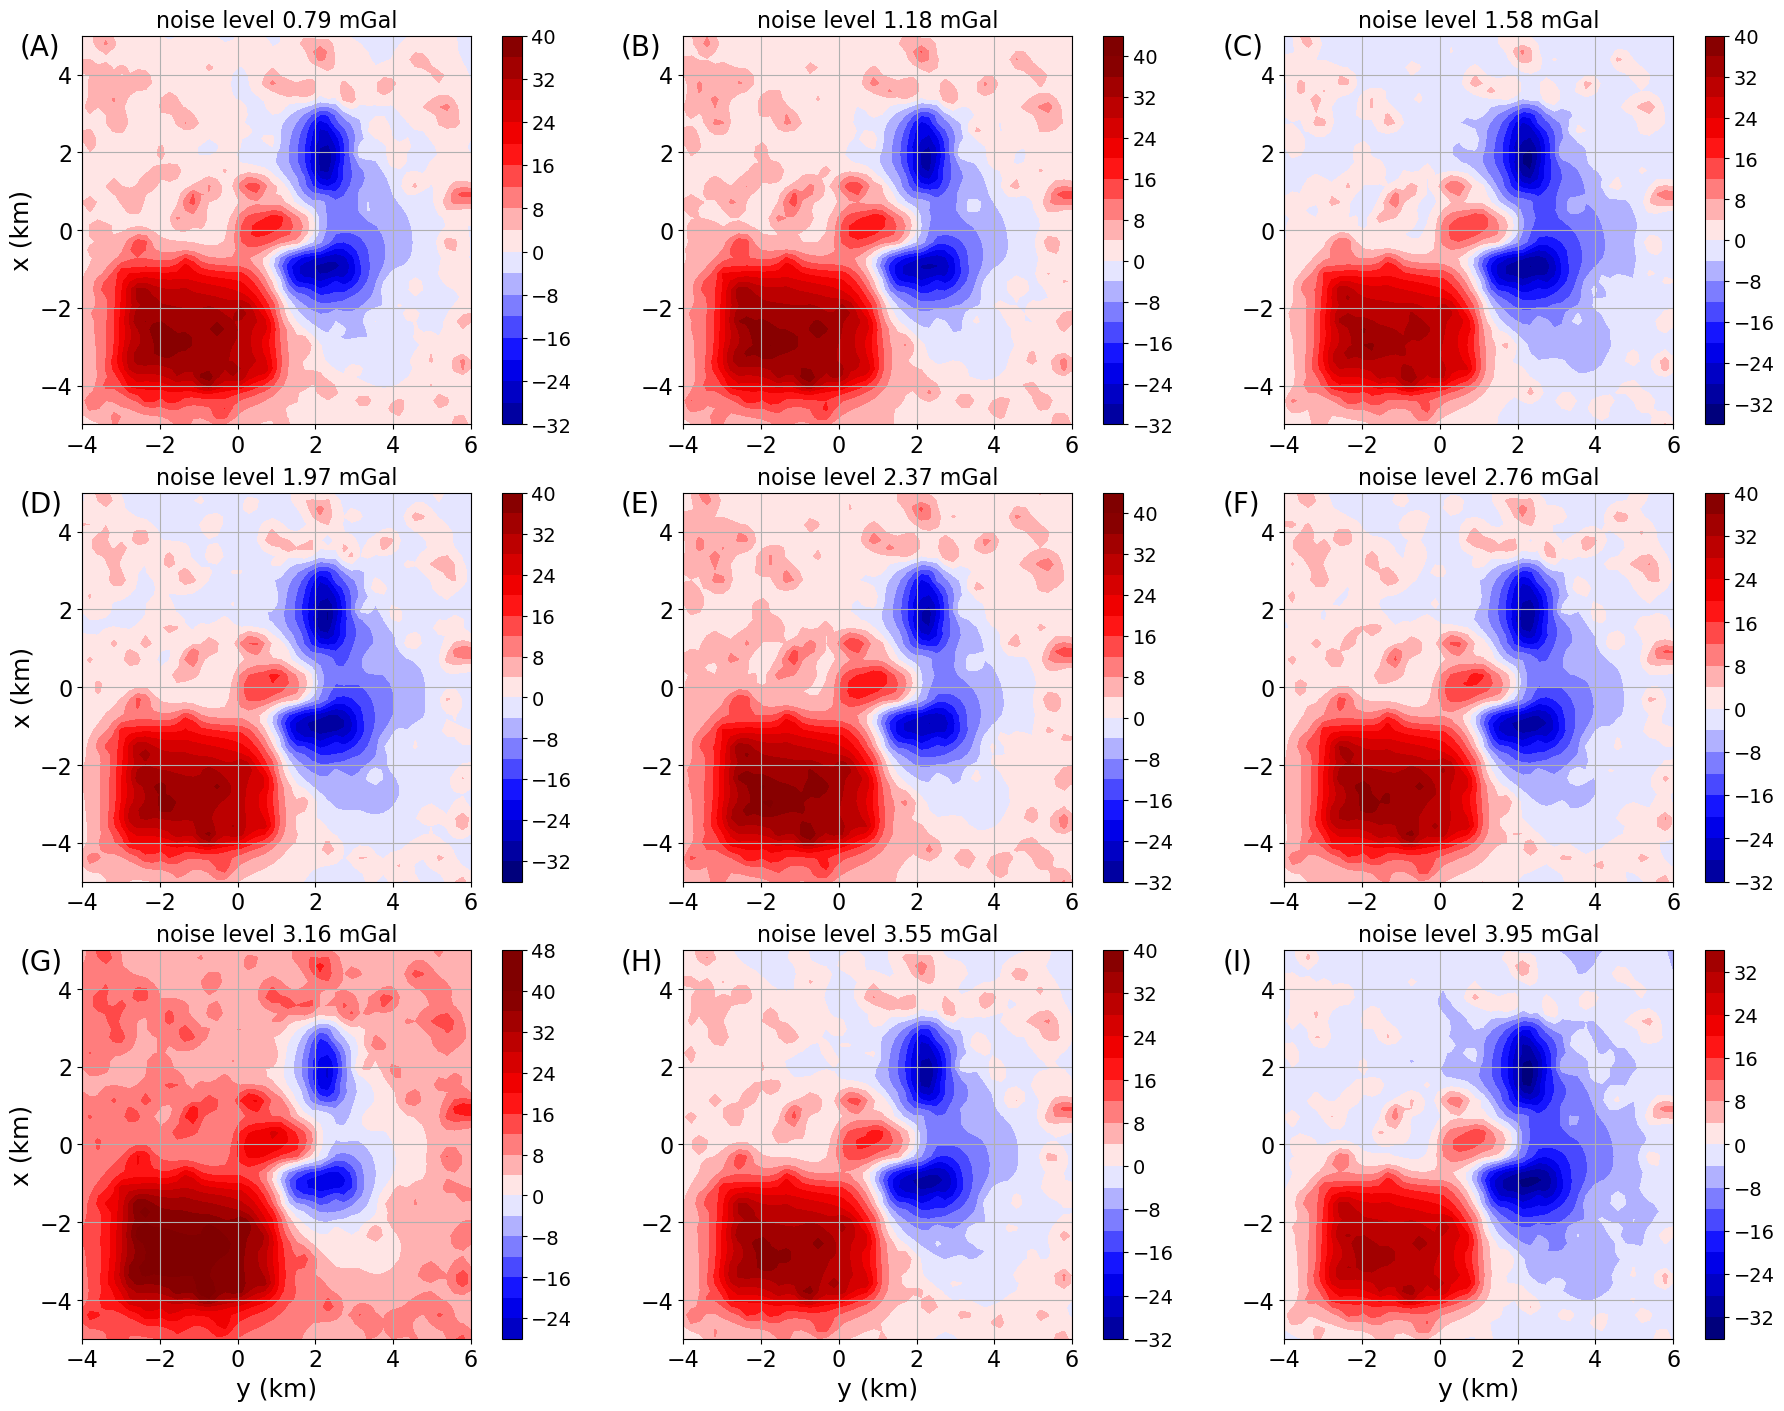

In [22]:
fig = plt.figure(layout= 'constrained', figsize=(18,14))
mosaic = fig.subplot_mosaic('''
                            abc
                            def
                            ghi
                            ''')
for (ax, level, label) in zip(
    mosaic.values(), levels, lables
):
    ax.axis('scaled')
    im = ax.contourf(data_points['coordinates']['y'].reshape(data_points['shape'])*0.001, 
                     data_points['coordinates']['x'].reshape(data_points['shape'])*0.001, 
                     noisy_data['d{}'.format(level)].reshape(data_points['shape']), 20, 
                     cmap='seismic', vmin=-ranges_gz, vmax=ranges_gz)
    cb = fig.colorbar(im, ax=ax)
    cb.ax.tick_params(labelsize=14)
    ax.set_title('noise level {:.2f} mGal'.format(noisy_data['nl{}'.format(level)]), fontsize=16)
    ax.set_ylim(0.001*data_points['area'][0], 0.001*data_points['area'][1])
    ax.set_xlim(0.001*data_points['area'][2], 0.001*data_points['area'][3])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid()
    ax.annotate(label, xy=(-0.16, 0.95), xycoords='axes fraction', fontsize=20)

for element in ['a','d','g']:
    mosaic[element].set_ylabel('x (km)', fontsize=18)
for element in ['g','h','i']:
    mosaic[element].set_xlabel('y (km)', fontsize=18)

plt.savefig('../manuscript/Fig/noise-corrupted-data.png', dpi= 300)
plt.show()

### Save noise-corrupted data

In [23]:
file_name = 'gravity_data_noisy.pickle'
with open(file_name, 'wb') as f:
    pickle.dump(noisy_data, f)